In [3]:
# importing all the libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [2]:
%pip install seaborn 

In [4]:
# Dataframes
AccountData = pd.read_csv('Step Up - Experian Account Data.csv')
AccountHolder = pd.read_csv('Step Up - Experian Acount Holder Data.csv')
MuleFlag = pd.read_csv('Mule Flag.csv')

In [5]:
AccountData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Identifier          1000 non-null   object 
 1   AccountLength       948 non-null    float64
 2   AverageBalance      948 non-null    float64
 3   NumTransactions     948 non-null    float64
 4   NumDeposits         948 non-null    float64
 5   NumWithdrawals      948 non-null    float64
 6   NumTransfers        948 non-null    float64
 7   NumLoans            948 non-null    float64
 8   NumCreditCards      949 non-null    float64
 9   NumSavingsAccounts  948 non-null    float64
dtypes: float64(9), object(1)
memory usage: 74.3+ KB


In [6]:
AccountHolder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Identifier                 1045 non-null   object 
 1   DateOfBirth                991 non-null    object 
 2   Gender                     992 non-null    object 
 3   Income                     989 non-null    float64
 4   CreditScore                987 non-null    float64
 5   LoanAmount                 990 non-null    float64
 6   EmploymentStatus           987 non-null    object 
 7   MaritalStatus              989 non-null    object 
 8   OccupancyStatus            990 non-null    object 
 9   NumDependents              990 non-null    float64
 10  SocialMediaUsageHours      985 non-null    float64
 11  ShoppingFrequencyPerMonth  990 non-null    float64
 12  HealthInsuranceStatus      989 non-null    object 
dtypes: float64(6), object(7)
memory usage: 77.6+ KB


In [7]:
MuleFlag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Identifier   1000 non-null   object 
 1   MuleAccount  948 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.8+ KB


In [8]:
AccountData.isnull().sum()

Identifier             0
AccountLength         52
AverageBalance        52
NumTransactions       52
NumDeposits           52
NumWithdrawals        52
NumTransfers          52
NumLoans              52
NumCreditCards        51
NumSavingsAccounts    52
dtype: int64

In [11]:
AccountHolder.isnull().sum()

Identifier                    0
DateOfBirth                  54
Gender                       53
Income                       56
CreditScore                  58
LoanAmount                   55
EmploymentStatus             58
MaritalStatus                56
OccupancyStatus              55
NumDependents                55
SocialMediaUsageHours        60
ShoppingFrequencyPerMonth    55
HealthInsuranceStatus        56
dtype: int64

In [12]:
MuleFlag.isnull().sum()

Identifier      0
MuleAccount    52
dtype: int64

In [13]:
# There are misssing values / NaN / Null  in the Dataset : 

In [14]:
accData_null = AccountData.isnull().sum().sum()
accHolder_null = AccountHolder.isnull().sum().sum()
muleFlag_null = MuleFlag.isnull().sum().sum()
print(f"Null Values in Acccount Holder is {accHolder_null}, Account Dataset is {accData_null} and Mule Flag dataset {muleFlag_null} ")

Null Values in Acccount Holder is 671, Account Dataset is 467 and Mule Flag dataset 52 


In [15]:
# There are Duplicate values in the dataset - Handeling duplicate values : 
# Checking the length and duplicate values of the files 
for i, data in enumerate([MuleFlag, AccountHolder, AccountData], 1):
    print(f"--- DataFrame {i} ---")
    print(f"Rows: {len(data)}")
    print(f"Duplicates: {data.duplicated().sum()}")
    print()

--- DataFrame 1 ---
Rows: 1000
Duplicates: 0

--- DataFrame 2 ---
Rows: 1045
Duplicates: 45

--- DataFrame 3 ---
Rows: 1000
Duplicates: 0



In [17]:

# Generate a list of columns
ad_cols = list(AccountData.columns)

# print the list of columns to the console (with some each column on a seperate line for readability)
print(f"\nAccount Data Columns: \n\n{chr(10).join(ad_cols)}")

# Print the length of the data
print(f"\nAccount Data Length: {len(AccountData)} records")

# Initialize an empty dictionary to store results
ad_column_stats = {}

# Loop through each column in the DataFrame
for col in ad_cols:
    # Calculate value counts
    value_counts = AccountData[col].value_counts(dropna = False)
    
    # Calculate percentage of blank (NaN or empty) values
    total_rows = len(AccountData)
    blank_count = AccountData[col].isna().sum()  # Count NaN values
    blank_percentage = (blank_count / total_rows) * 100 if total_rows > 0 else 0
    
    # Store the results in the dictionary
    ad_column_stats[col] = {
        "value_counts": value_counts,
        "%_blank": blank_percentage
    }
    
# Check for dupes
ad_duplicates = AccountData[AccountData.duplicated()]
print(f"\nAccount Data Duplicates: {len(ad_duplicates)}")


Account Data Columns: 

Identifier
AccountLength
AverageBalance
NumTransactions
NumDeposits
NumWithdrawals
NumTransfers
NumLoans
NumCreditCards
NumSavingsAccounts

Account Data Length: 1000 records

Account Data Duplicates: 0


In [19]:
# Generate a list of columns
ah_cols = list(AccountHolder.columns)

# print the list of columns to the console (with some each column on a seperate line for readability)
print(f"\nAccount Holder Data Columns: \n\n{chr(10).join(ah_cols)}")

# Print the length of the data
print(f"\nAccount Holder Data Length: {len(AccountHolder)} records")

# Initialize an empty dictionary to store results
ah_column_stats = {}

# Loop through each column in the DataFrame
for col in ah_cols:
    # Calculate value counts
    value_counts = AccountHolder[col].value_counts(dropna = False)
    
    # Calculate percentage of blank (NaN or empty) values
    total_rows = len(AccountHolder)
    blank_count = AccountHolder[col].isna().sum()  # Count NaN values
    blank_percentage = (blank_count / total_rows) * 100 if total_rows > 0 else 0
    
    # Store the results in the dictionary
    ah_column_stats[col] = {
        "value_counts": value_counts,
        "%_blank": blank_percentage
    }
    # Check for dupes
ah_duplicates = AccountHolder[AccountHolder.duplicated()]
print(f"\nAccount Holder Data Duplicates: {len(ah_duplicates)}")


Account Holder Data Columns: 

Identifier
DateOfBirth
Gender
Income
CreditScore
LoanAmount
EmploymentStatus
MaritalStatus
OccupancyStatus
NumDependents
SocialMediaUsageHours
ShoppingFrequencyPerMonth
HealthInsuranceStatus

Account Holder Data Length: 1045 records

Account Holder Data Duplicates: 45


In [22]:
# Generate a list of columns
mf_cols = list(MuleFlag.columns)

# Print the list of columns to the console (with some each column on a seperate line for readability)
print(f"\nMule Flag Columns: \n\n{chr(10).join(mf_cols)}")

# Print the length of the data
print(f"\nMule Flag Length: {len(MuleFlag)} records")

# Initialize an empty dictionary to store results
mf_column_stats = {}

# Loop through each column in the DataFrame
for col in mf_cols:
    # Calculate value counts
    value_counts = MuleFlag[col].value_counts(dropna = False)
    
    # Calculate percentage of blank (NaN or empty) values
    total_rows = len(MuleFlag)
    blank_count = MuleFlag[col].isna().sum()  # Count NaN values
    blank_percentage = (blank_count / total_rows) * 100 if total_rows > 0 else 0
    
    # Store the results in the dictionary
    mf_column_stats[col] = {
        "value_counts": value_counts,
        "%_blank": blank_percentage
    }
    
# Check for dupes
mf_duplicates = MuleFlag[MuleFlag.duplicated()]
print(f"\nMule Flag Duplicates: {len(mf_duplicates)}")



Mule Flag Columns: 

Identifier
MuleAccount

Mule Flag Length: 1000 records

Mule Flag Duplicates: 0


In [23]:
# Compare the ID values across the three files
ids1 = set(MuleFlag['Identifier'])
ids2 = set(AccountHolder['Identifier'])
ids3 = set(AccountData['Identifier'])

In [24]:
# Finding common id among all the three df's 
common_ids = ids1 & ids2 & ids3
print(f"Common IDs in all 3 files: {len(common_ids)}")

Common IDs in all 3 files: 1000


In [27]:
# Check for Duplicate Identifier Values
print(MuleFlag['Identifier'].duplicated().sum())
print(AccountHolder['Identifier'].duplicated().sum())
print(AccountData['Identifier'].duplicated().sum())

0
45
0


In [26]:
# There are 1000 common ID's among the three dataframes 
# However there are 45 duplicate records in AccountHolder Dataset that needs to be droped. 

In [28]:
# Dropping the 45 Duplicated values from AccountHolder Dataframe 
AccountHolder.drop_duplicates(inplace=True)

In [29]:
# Verifying the Dataset for duplicate Values 
print(AccountHolder['Identifier'].duplicated().sum())

0


In [32]:
# Handling the Missing Values Account Data
ad_missing_values = {
    "AccountLength" : -1,
    "AverageBalance" : -1,
    "NumTransactions" : -1,
    "NumDeposits" : -1,
    "NumWithdrawals" : -1,
    "NumTransfers" : -1,
    "NumLoans" : -1,
    "NumCreditCards" :-1,
    "NumSavingsAccounts" :-1,
    }
AccountData = AccountData.fillna(value = ad_missing_values)

In [33]:
# Handling Missing Values Account Holder
ah_missing_values = { 
    'DateOfBirth': 'Missing',
    'Gender' : 'Missing',
    'Income': -1,
    'CreditScore': -1,
    'LoanAmount': -1,
    'EmploymentStatus': 'Missing',
    'MaritalStatus': 'Missing',
    'OccupancyStatus': 'Missing',
    'NumDependents': -1,
    'SocialMediaUsageHours': -1,
    'ShoppingFrequencyPerMonth': -1,
    'HealthInsuranceStatus': 'Missing'
    }

AccountHolder = AccountHolder.fillna(value = ah_missing_values)

In [35]:
# Handling Missing Values MuleFlag
MuleFlag = MuleFlag.fillna(0)

In [41]:
# Verifying the Handling Missing Values 
AccountData.isnull().sum()

Identifier            0
AccountLength         0
AverageBalance        0
NumTransactions       0
NumDeposits           0
NumWithdrawals        0
NumTransfers          0
NumLoans              0
NumCreditCards        0
NumSavingsAccounts    0
dtype: int64

In [42]:
# Verifying the Handling Missing Values 
AccountHolder.isnull().sum()

Identifier                   0
DateOfBirth                  0
Gender                       0
Income                       0
CreditScore                  0
LoanAmount                   0
EmploymentStatus             0
MaritalStatus                0
OccupancyStatus              0
NumDependents                0
SocialMediaUsageHours        0
ShoppingFrequencyPerMonth    0
HealthInsuranceStatus        0
dtype: int64

In [43]:
# Merging the DataFrames
# Merging MuleFlag and AccountHolder
merged_df = pd.merge(MuleFlag, AccountHolder, on='Identifier', how='outer')

# Merging the result with AccountData
final_df = pd.merge(merged_df, AccountData, on='Identifier', how='outer')

In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Identifier                 1000 non-null   object 
 1   MuleAccount                1000 non-null   float64
 2   DateOfBirth                1000 non-null   object 
 3   Gender                     1000 non-null   object 
 4   Income                     1000 non-null   float64
 5   CreditScore                1000 non-null   float64
 6   LoanAmount                 1000 non-null   float64
 7   EmploymentStatus           1000 non-null   object 
 8   MaritalStatus              1000 non-null   object 
 9   OccupancyStatus            1000 non-null   object 
 10  NumDependents              1000 non-null   float64
 11  SocialMediaUsageHours      1000 non-null   float64
 12  ShoppingFrequencyPerMonth  1000 non-null   float64
 13  HealthInsuranceStatus      1000 non-null   object

In [46]:
# Datacreation 
# Backup Dataframe
backup_finaldf = final_df.copy()
# Convert DateOfBirth column to datetime
today = datetime.today()
final_df['DateOfBirth'] = pd.to_datetime(final_df['DateOfBirth'], format='%d/%m/%Y', errors='coerce') 
final_df['Age'] = final_df['DateOfBirth'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)))

In [47]:
# Create some bins for age to make it categorical (e.g. 18 - 24, 25 - 35, 35 - 45 etc.)
# Define age bins and labels
bins = [0, 17, 24, 35, 45, 60, 100]  # Define bin edges
labels = ['0-17', '18-24', '25-35', '36-45', '46-60', '60+']  # Define bin labels

In [48]:
# Create age categories
final_df['AgeGroup'] = pd.cut(final_df['Age'], bins=bins, labels=labels, right=False)

In [49]:
# Define income bins and labels
bins = [0, 10000, 20000, 30000, 40000, 60000, 80000, 100000]  # Define bin edges
labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-60k', '60k-80k','80k+']  # Define bin labels

# Create income categories
final_df['IncomeGroup'] = pd.cut(final_df['Income'], bins=bins, labels=labels, right=False)


In [50]:
final_df

,Identifier,MuleAccount,DateOfBirth,Gender,Income,CreditScore,LoanAmount,EmploymentStatus,MaritalStatus,OccupancyStatus,...,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts,Age,AgeGroup,IncomeGroup
0,ID_0001,0.0,1964-01-06,Female,96534.0,-1.0,44116.0,Unemployed,Single,Owner,...,305.0,230.0,288.0,39.0,7.0,2.0,0.0,61.0,60+,80k+
1,ID_0002,0.0,2004-11-26,Male,75106.0,390.0,9782.0,Unemployed,Missing,Owner,...,331.0,203.0,147.0,5.0,-1.0,4.0,2.0,20.0,18-24,60k-80k
2,ID_0003,0.0,1992-07-02,Male,50678.0,779.0,38650.0,Student,Divorced,Owner,...,109.0,43.0,227.0,37.0,4.0,1.0,1.0,32.0,25-35,40k-60k
3,ID_0004,0.0,1974-07-03,Male,96218.0,757.0,22366.0,Student,Single,Owner,...,87.0,149.0,236.0,168.0,1.0,2.0,1.0,50.0,46-60,80k+
4,ID_0005,0.0,1976-05-13,Male,83230.0,750.0,28557.0,Employed,Single,Owner,...,-1.0,49.0,37.0,99.0,9.0,3.0,2.0,49.0,46-60,80k+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ID_0996,0.0,1979-08-17,Missing,55262.0,-1.0,1299.0,Unemployed,Widowed,Renter,...,306.0,149.0,254.0,168.0,4.0,4.0,0.0,45.0,46-60,40k-60k
996,ID_0997,0.0,1967-10-10,Female,98213.0,725.0,39469.0,Unemployed,Married,Renter,...,456.0,134.0,-1.0,41.0,3.0,4.0,1.0,57.0,46-60,80k+
997,ID_0998,0.0,1962-04-03,Male,38268.0,324.0,4994.0,Retired,Divorced,Missing,...,425.0,145.0,27.0,134.0,2.0,3.0,2.0,63.0,60+,30k-40k
998,ID_0999,0.0,1986-05-02,Male,97866.0,802.0,29878.0,Employed,Married,Renter,...,29.0,97.0,52.0,14.0,7.0,2.0,-1.0,39.0,36-45,80k+


In [51]:
final = final_df.copy()

In [52]:
# Get the list of columns
cols = final.columns.tolist()

# Remove 'Age' and 'AgeGroup' from the list if they exist
cols.remove('Age')
cols.remove('AgeGroup')

# Insert them right before 'Gender'
dob_index = cols.index('Gender')
cols = cols[:dob_index] + ['Age', 'AgeGroup'] + cols[dob_index:]

# Reorder the DataFrame
final = final[cols]

In [53]:
final

,Identifier,MuleAccount,DateOfBirth,Age,AgeGroup,Gender,Income,CreditScore,LoanAmount,EmploymentStatus,...,AccountLength,AverageBalance,NumTransactions,NumDeposits,NumWithdrawals,NumTransfers,NumLoans,NumCreditCards,NumSavingsAccounts,IncomeGroup
0,ID_0001,0.0,1964-01-06,61.0,60+,Female,96534.0,-1.0,44116.0,Unemployed,...,19.0,-1.0,305.0,230.0,288.0,39.0,7.0,2.0,0.0,80k+
1,ID_0002,0.0,2004-11-26,20.0,18-24,Male,75106.0,390.0,9782.0,Unemployed,...,3.0,24989.0,331.0,203.0,147.0,5.0,-1.0,4.0,2.0,60k-80k
2,ID_0003,0.0,1992-07-02,32.0,25-35,Male,50678.0,779.0,38650.0,Student,...,-1.0,10915.0,109.0,43.0,227.0,37.0,4.0,1.0,1.0,40k-60k
3,ID_0004,0.0,1974-07-03,50.0,46-60,Male,96218.0,757.0,22366.0,Student,...,19.0,43552.0,87.0,149.0,236.0,168.0,1.0,2.0,1.0,80k+
4,ID_0005,0.0,1976-05-13,49.0,46-60,Male,83230.0,750.0,28557.0,Employed,...,9.0,19990.0,-1.0,49.0,37.0,99.0,9.0,3.0,2.0,80k+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,ID_0996,0.0,1979-08-17,45.0,46-60,Missing,55262.0,-1.0,1299.0,Unemployed,...,1.0,39437.0,306.0,149.0,254.0,168.0,4.0,4.0,0.0,40k-60k
996,ID_0997,0.0,1967-10-10,57.0,46-60,Female,98213.0,725.0,39469.0,Unemployed,...,17.0,36503.0,456.0,134.0,-1.0,41.0,3.0,4.0,1.0,80k+
997,ID_0998,0.0,1962-04-03,63.0,60+,Male,38268.0,324.0,4994.0,Retired,...,15.0,31746.0,425.0,145.0,27.0,134.0,2.0,3.0,2.0,30k-40k
998,ID_0999,0.0,1986-05-02,39.0,36-45,Male,97866.0,802.0,29878.0,Employed,...,20.0,28923.0,29.0,97.0,52.0,14.0,7.0,2.0,-1.0,80k+


<h2> Data Analysis </h2>

In [58]:
# Grouping the data based on Age Group and sum mules flags
age_group = final.groupby('AgeGroup')['MuleAccount'].sum().sort_values(ascending=False)
print(age_group)

<ipython-input-58-7ca92c0f8368>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = final.groupby('AgeGroup')['MuleAccount'].sum().sort_values(ascending=False)


AgeGroup
46-60    19.0
36-45    13.0
25-35    10.0
18-24     8.0
60+       8.0
0-17      0.0
Name: MuleAccount, dtype: float64


In [59]:
# Group by gender and sum mules flags
gender_summary = final.groupby('Gender')['MuleAccount'].sum()
print(gender_summary)

Gender
Female     26.0
Male       30.0
Missing     3.0
Name: MuleAccount, dtype: float64


In [69]:
# Group by characteristics and sum mules_flags
characteristics = ['AgeGroup', 'Gender']
mule_summary = final.groupby(characteristics)['MuleAccount'].sum().reset_index()

# Sort by the highest number of mule accounts
mule_summary = mule_summary.sort_values(by='MuleAccount', ascending=False)

print("Characteristics with the highest number of mule accounts:")
print(mule_summary.head(10))

<ipython-input-69-226d8d46cd30>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mule_summary = final.groupby(characteristics)['MuleAccount'].sum().reset_index()


Characteristics with the highest number of mule accounts:
   AgeGroup   Gender  MuleAccount
12    46-60   Female         11.0
10    36-45     Male         11.0
15      60+   Female          6.0
7     25-35     Male          6.0
4     18-24     Male          5.0
13    46-60     Male          5.0
6     25-35   Female          4.0
3     18-24   Female          3.0
14    46-60  Missing          3.0
9     36-45   Female          2.0


In [70]:
# By Employment Status 
emp_trend = final.groupby('EmploymentStatus')['MuleAccount'].sum().sort_values(ascending=False)
print(emp_trend)

EmploymentStatus
Student       18.0
Employed      16.0
Unemployed    13.0
Retired       12.0
Missing        0.0
Name: MuleAccount, dtype: float64


In [71]:
# By Credit Score 
credit_bins = [0, 500, 600, 700, 800, 900]
credit_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

final['CreditBand'] = pd.cut(final['CreditScore'], bins=credit_bins, labels=credit_labels)
credit_trend = final.groupby('CreditBand')['MuleAccount'].sum().sort_values(ascending=False)
print(credit_trend)

<ipython-input-71-9104b50c14b3>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_trend = final.groupby('CreditBand')['MuleAccount'].sum().sort_values(ascending=False)


CreditBand
Poor         22.0
Fair         13.0
Very Good    12.0
Good          8.0
Excellent     1.0
Name: MuleAccount, dtype: float64


In [72]:
# Income bands (you may need to create bins if it's numeric)
income_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
income_labels = ['<20K', '20K–40K', '40K–60K', '60K–80K', '80K–100K', '100K+']
final['IncomeBand'] = pd.cut(final['Income'], bins=income_bins, labels=income_labels)

final.groupby('IncomeBand')['MuleAccount'].sum().sort_values(ascending=False)

# LoanAmount bands
loan_bins = [0, 5000, 10000, 20000, 30000, float('inf')]
loan_labels = ['<5K', '5K–10K', '10K–20K', '20K–30K', '30K+']
final['LoanBand'] = pd.cut(final['LoanAmount'], bins=loan_bins, labels=loan_labels)

final.groupby('LoanBand')['MuleAccount'].sum().sort_values(ascending=False)

<ipython-input-72-18ff4780889c>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final.groupby('IncomeBand')['MuleAccount'].sum().sort_values(ascending=False)
<ipython-input-72-18ff4780889c>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  final.groupby('LoanBand')['MuleAccount'].sum().sort_values(ascending=False)


LoanBand
30K+       21.0
20K–30K    13.0
10K–20K     9.0
<5K         8.0
5K–10K      5.0
Name: MuleAccount, dtype: float64

<h2> Data Visualisation  </h2>

<ipython-input-73-e1186ad8814d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='MuleAccount', data=final, estimator=sum, palette='Set1', errorbar=None, legend=False, edgecolor='black')


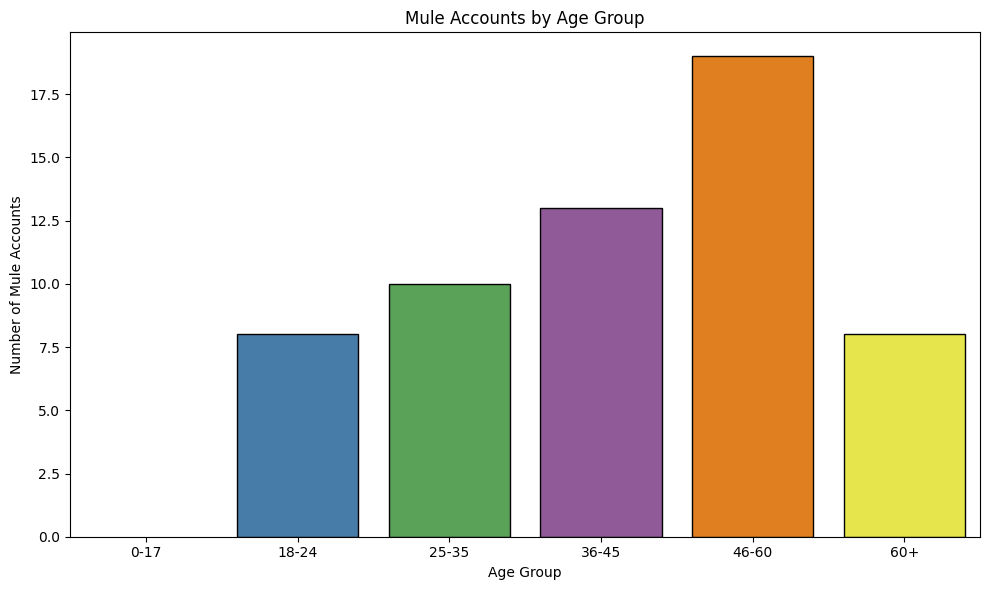

In [73]:
# Chart 1: Mule Accounts by Age Group
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='MuleAccount', data=final, estimator=sum, palette='Set1', errorbar=None, legend=False, edgecolor='black') 
plt.title('Mule Accounts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Mule Accounts')
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


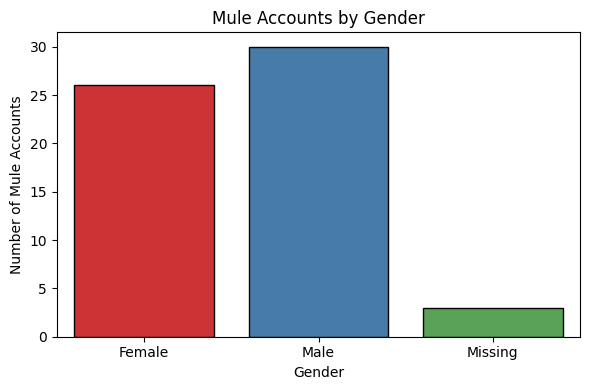

In [74]:
# Chart 2: Mule Accounts by Gender
plt.figure(figsize=(6, 4))
sns.barplot(
    x='Gender',
    y='MuleAccount',
    hue='Gender',          
    data=final,
    estimator=sum,
    palette='Set1',
    errorbar=None,
    edgecolor='black'
)
plt.title('Mule Accounts by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Mule Accounts')
plt.legend().remove()     
plt.tight_layout()
plt.show()

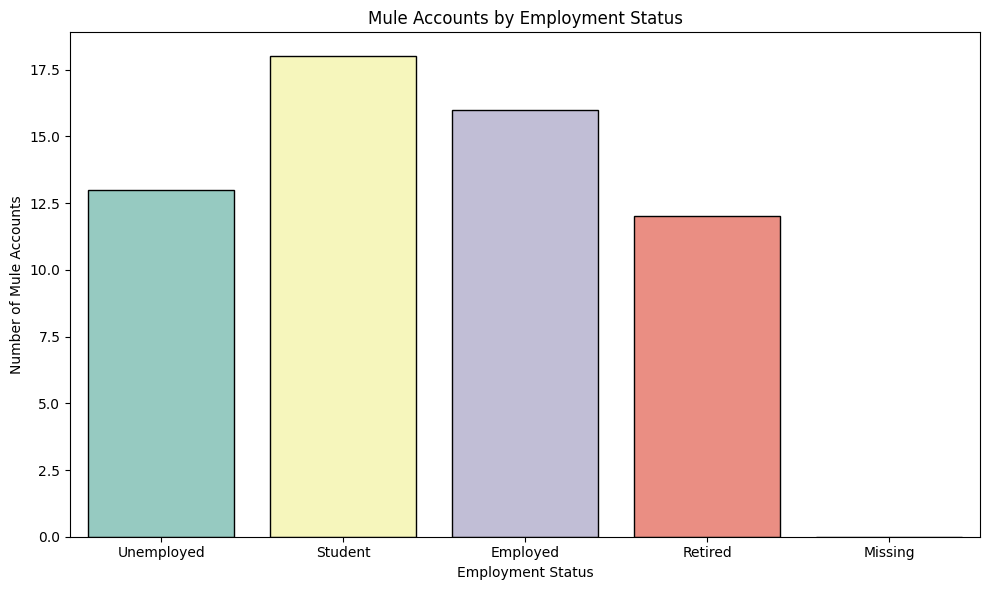

In [75]:
# Chart 3: Mule Accounts by Employment Status
plt.figure(figsize=(10, 6))
sns.barplot(
    x='EmploymentStatus',
    y='MuleAccount',
    hue='EmploymentStatus',
    data=final,
    estimator=sum,
    palette='Set3',
    errorbar=None,
    edgecolor='black'
)
plt.title('Mule Accounts by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Mule Accounts')
plt.tight_layout()
plt.show()

<ipython-input-76-5e84ab63c2ed>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


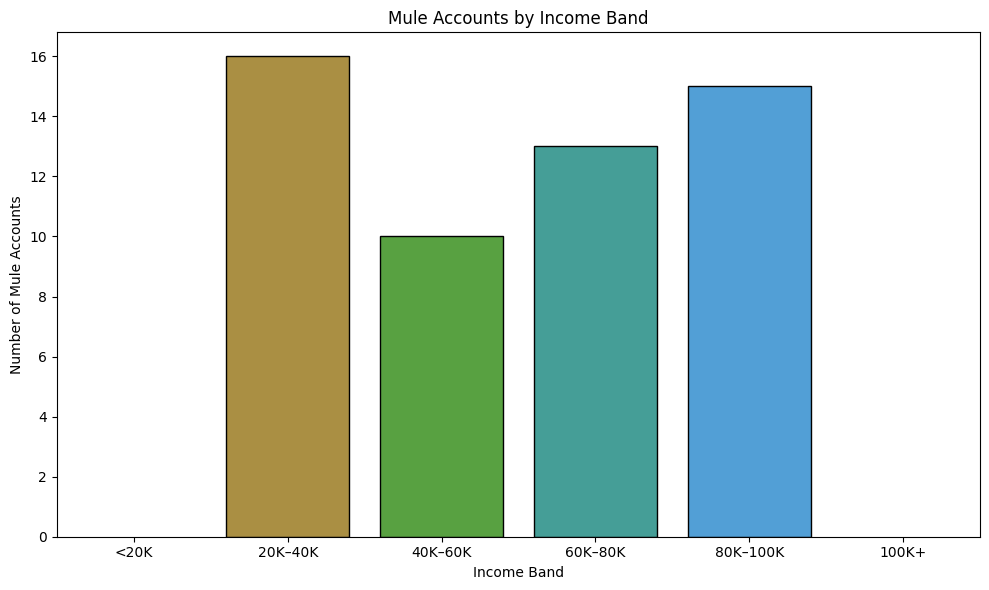

In [76]:
# Chart 4: Mule Accounts by Income Band
plt.figure(figsize=(10, 6))
sns.barplot(
    x='IncomeBand',
    y='MuleAccount',
    data=final,
    estimator=sum,
    palette='husl',
    errorbar=None,
    edgecolor='black'
)
plt.title('Mule Accounts by Income Band')
plt.xlabel('Income Band')
plt.ylabel('Number of Mule Accounts')
plt.tight_layout()
plt.show()

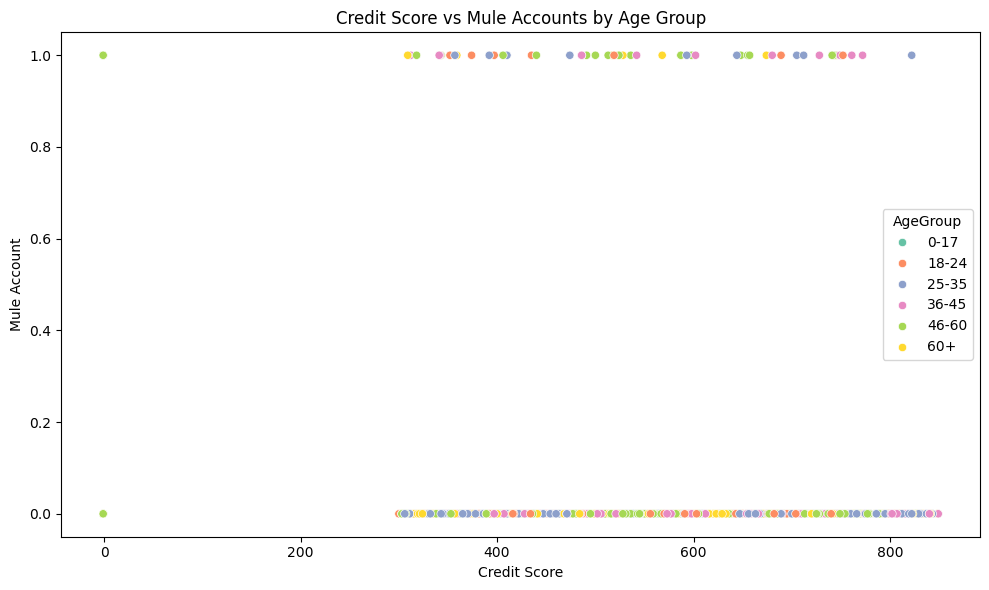

In [77]:
# Chart 5: Scatter Plot – Credit Score vs Mule Accounts (by Age Group)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='CreditScore',
    y='MuleAccount',
    data=final,
    hue='AgeGroup',
    palette='Set2'
)
plt.title('Credit Score vs Mule Accounts by Age Group')
plt.xlabel('Credit Score')
plt.ylabel('Mule Account')
plt.tight_layout()
plt.show()